In [511]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# NYT US data by county

In [521]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')
df.to_csv('data/Country detailed/Detailed Data - US - NYT.csv')
df.iloc[-1]['date']

'2020-04-01'

In [522]:
focus_state = 'New York'

focus = df[df['state']==focus_state].drop('state', axis=1).pivot(index='date',columns='county',values='cases')
for i in list(focus):
    focus[i] = focus[i] - focus[i].shift(1)
    
focus = focus[focus.sum().sort_values(ascending=False).index.tolist()]
focus.index.rename(focus_state, inplace=True)

In [523]:
focus.to_clipboard()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


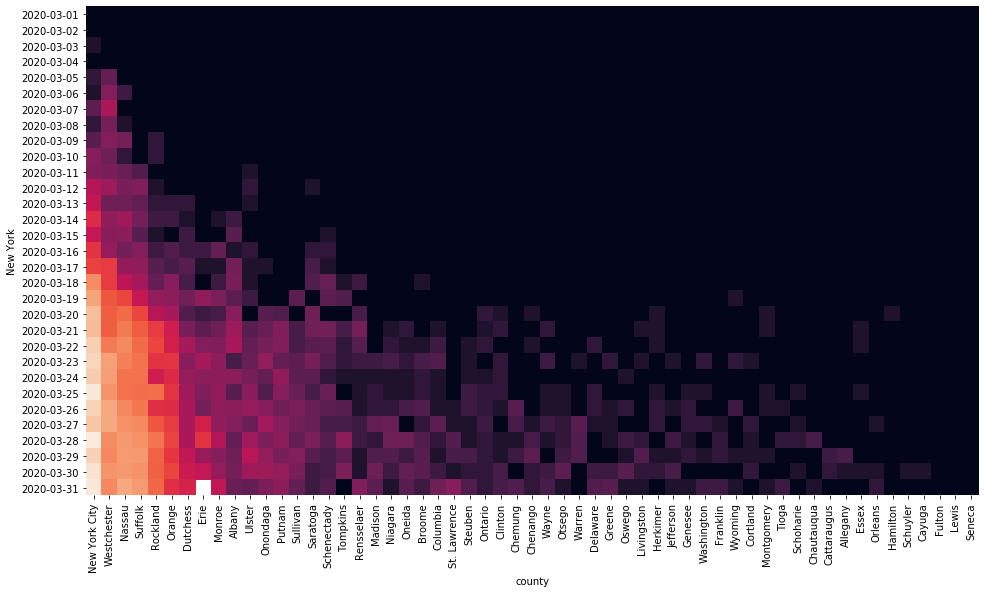

In [348]:
fig, ax = plt.subplots(1, 1, figsize=(16,9))
sns.heatmap(np.log(focus.fillna(0)+1), cbar=None)

# NYT US data by state

In [508]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')
df.iloc[-1]['date']

'2020-03-31'

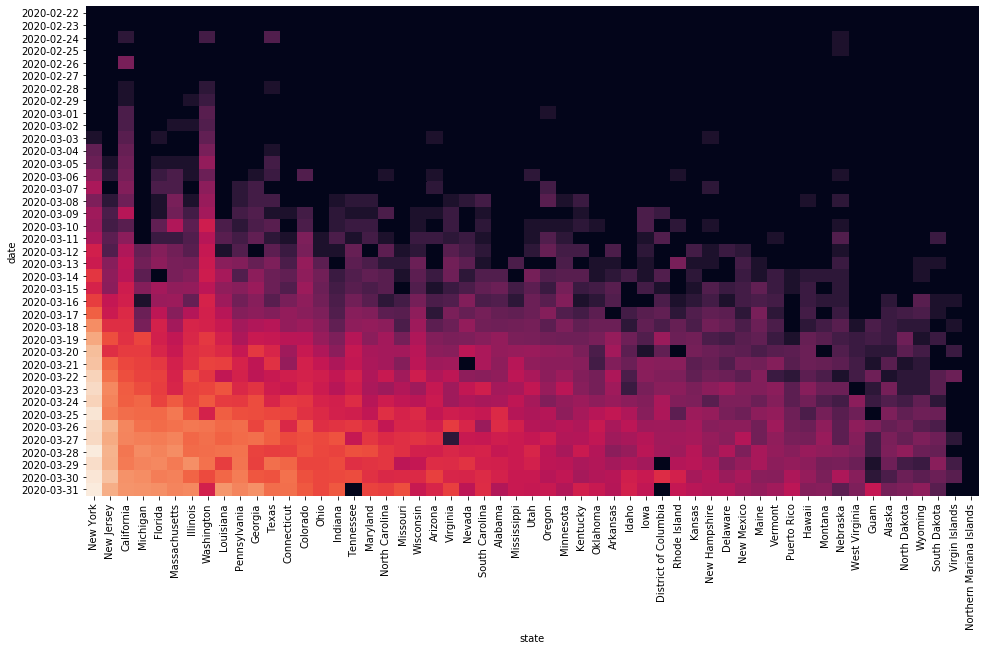

In [415]:
focus = df.pivot(index='date',columns='state',values='cases').iloc[32:]
for i in list(focus):
    focus[i] = focus[i] - focus[i].shift(1)
    
focus = focus[focus.sum().sort_values(ascending=False).index.tolist()]


fig, ax = plt.subplots(1, 1, figsize=(16,9))
sns.heatmap(np.log(focus.fillna(0)+1), cbar=None)

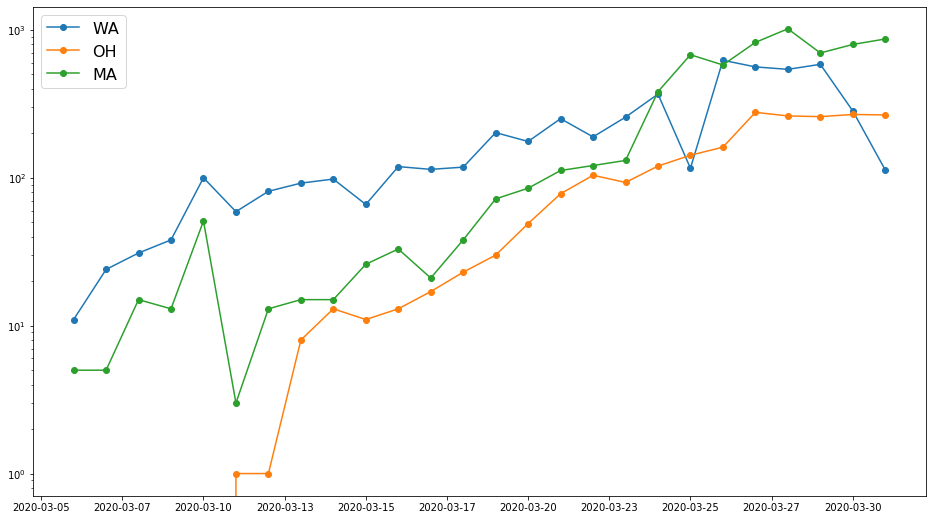

In [495]:
focus = df.pivot(index='date',columns='state',values='cases').iloc[44:]
for i in list(focus):
    focus[i] = focus[i] - focus[i].shift(1)
    
focus = focus[focus.sum().sort_values(ascending=False).index.tolist()]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,9))
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
ax.plot(focus.index, focus['Washington'], 'o-', label='WA')
ax.plot(focus.index, focus['Ohio'], 'o-', label='OH')
ax.plot(focus.index, focus['Massachusetts'], 'o-', label='MA')
ax.set_yscale('log')
ax.legend(fontsize=16)

# COVIDtracking data by state

In [534]:
df = pd.read_csv('data/country detailed/daily.csv')
df.iloc[0]['date']

20200404

In [518]:
focus = df[df['date']==20200401].copy().dropna(subset=['positive'])
focus['pos rate'] = focus['positive'] / focus['total']
focus.sort_values('pos rate', ascending=False)[['state','positive','pos rate']].head(30)

,state,positive,pos rate
27,MP,6.0,1.000000
24,MI,9334.0,0.439723
34,NJ,22255.0,0.422761
37,NY,83712.0,0.378993
39,OK,719.0,0.365531
11,GA,4638.0,0.228181
28,MS,1073.0,0.224242
7,CT,3557.0,0.214277
44,SC,1293.0,0.204395
17,IN,2565.0,0.178435


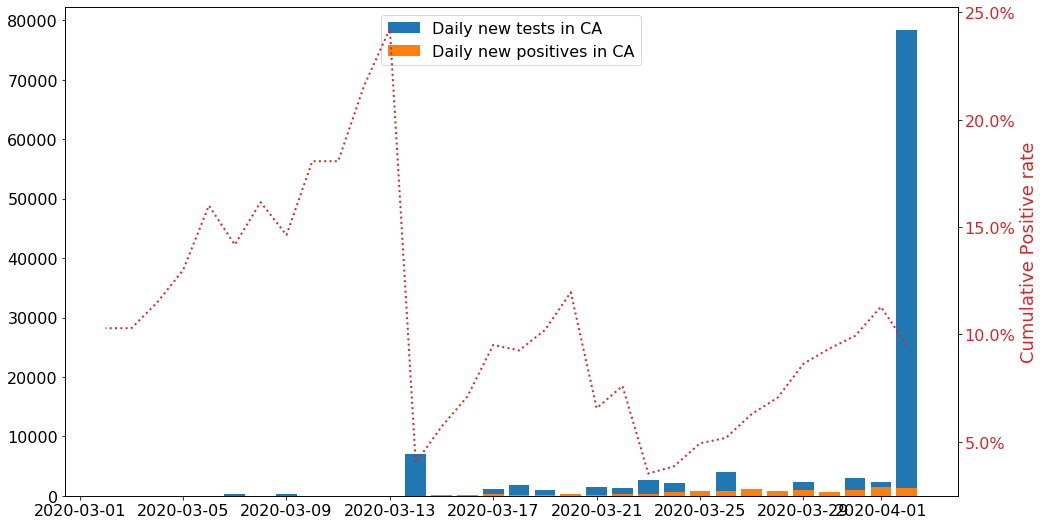

In [536]:
focus_state = 'CA'
focus = df[df['state']==focus_state].drop('state', axis=1)
focus.index = pd.date_range(end='2020-4-2',periods=len(focus), freq='D')[::-1]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,9))

ax.bar(x=focus.index, height=focus['totalTestResultsIncrease'],label='Daily new tests in '+focus_state)
ax.bar(x=focus.index, height=focus['positiveIncrease'],label='Daily new positives in '+focus_state)
ax.legend(fontsize=16)

ax2 = ax.twinx()
color = 'tab:red'
ax2.set_ylabel('Cumulative Positive rate', color=color, fontsize=18)
ax2.plot(focus['positive']/focus['total']*100, ls=':', lw=2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.tick_params(labelsize=16)
ax2.tick_params(labelsize=16)
plt.show()

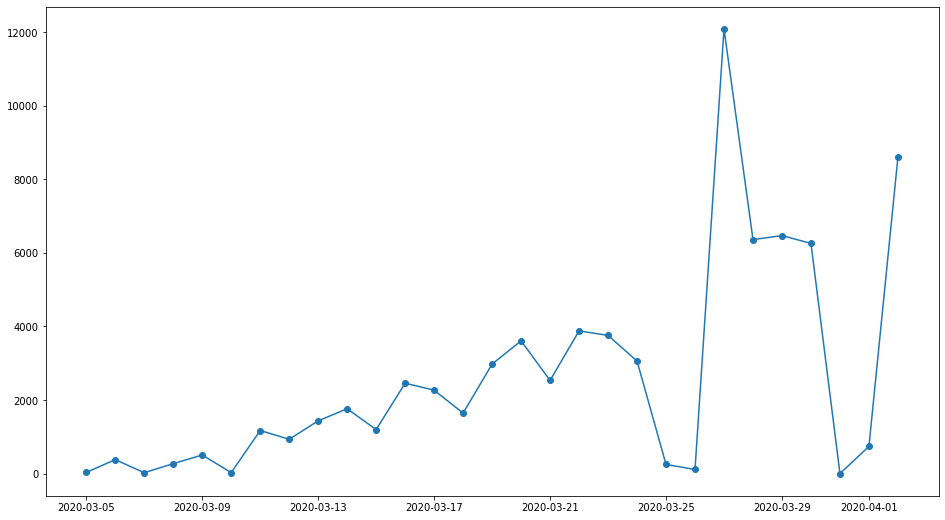

In [530]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,9))

focus_state = 'WA'
focus = df[df['state']==focus_state].drop('state', axis=1)
focus.index = pd.date_range(end='2020-4-2',periods=len(focus), freq='D')[::-1]
ax.plot(focus.index, focus['totalTestResultsIncrease'], '-o', label='WA')

# focus_state = 'OH'
# focus = df[df['state']==focus_state].drop('state', axis=1)
# focus.index = pd.date_range(end='2020-3-31',periods=len(focus), freq='D')[::-1]
# ax.plot(focus.index, focus['totalTestResultsIncrease'], '-o', label='OH')

# focus_state = 'MA'
# focus = df[df['state']==focus_state].drop('state', axis=1)
# focus.index = pd.date_range(end='2020-3-31',periods=len(focus), freq='D')[::-1]
# ax.plot(focus.index, focus['totalTestResultsIncrease'], '-o', label='MA')

# ax.set_yscale('log')
# ax.legend(fontsize=16)

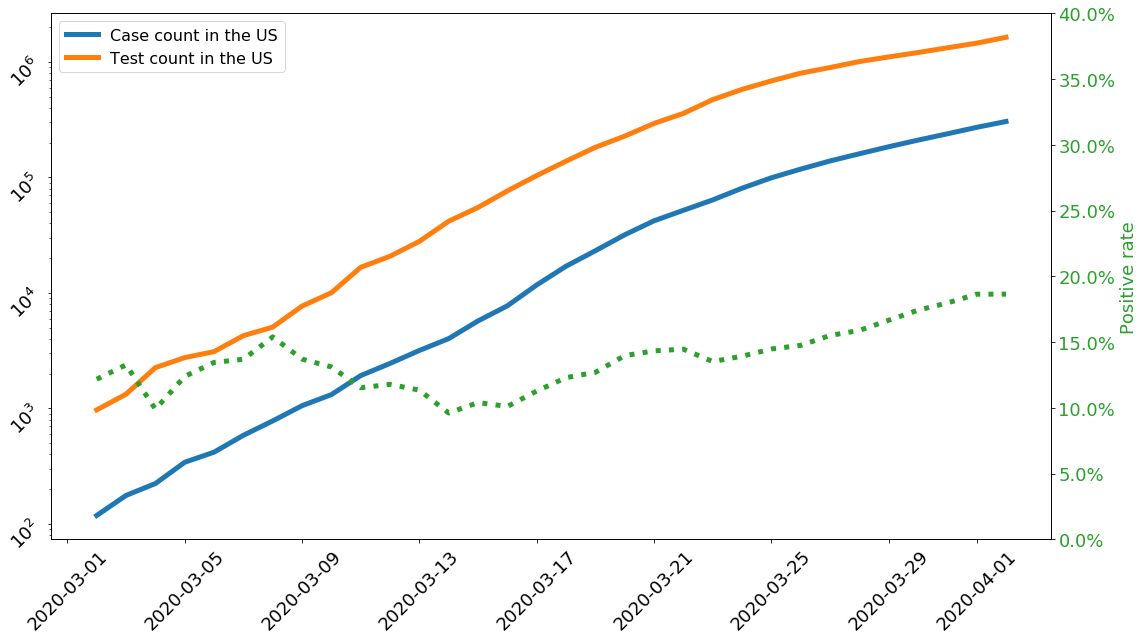

In [537]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,9))

focus = df.groupby('date').agg(sum).copy()
focus.index = pd.date_range(end='2020-4-2',periods=len(focus), freq='D')

ax.plot(focus.index, focus['positive'], lw=5, label='Case count in the US')
ax.plot(focus.index, focus['total'], lw=5, label='Test count in the US')
ax.set_yscale('log')
ax.legend(fontsize=16)
# ax.annotate('dfsdf',xy=(5, 500))
plt.tick_params(axis='both', which='major', rotation=45, labelsize=18)

ax2 = ax.twinx()
color = 'tab:green'
ax2.set_ylabel('Positive rate', color=color, fontsize=18)
ax2.plot(focus.index, focus['positive']/focus['total']*100, ls=':', lw=5, color=color, label='Positive rate')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0,40)

plt.tick_params(axis='both', which='major', labelsize=18)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.tight_layout()

plt.savefig('figures/Daily_misc_4_5.png', dps=600)